In [322]:
# Step 1: Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [323]:
df = pd.read_csv("cereal.csv")

In [324]:
# Step 3: View the first few rows of the dataset
print(df.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [325]:
# Step 4: Get a summary of data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None


In [326]:
# Step 5: Display summary statistics for numerical columns
print(df.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

In [327]:
# Select the relevant columns
nutritional_features = ["calories", "sugars", "fiber", "fat", "protein"]

# Calculate summary statistics
summary_stats = df[nutritional_features].agg(["mean", "median", "std", "min", "max"])

# Display the results
print(summary_stats)


          calories     sugars      fiber       fat   protein
mean    106.883117   6.922078   2.151948  1.012987  2.545455
median  110.000000   7.000000   2.000000  1.000000  3.000000
std      19.484119   4.444885   2.383364  1.006473  1.094790
min      50.000000  -1.000000   0.000000  0.000000  1.000000
max     160.000000  15.000000  14.000000  5.000000  6.000000


In [328]:
# Step 1: Count occurrences of each manufacturer code
manufacturer_counts = df["mfr"].value_counts()
print("Manufacturer Code Counts:\n", manufacturer_counts)

# Step 2: Map manufacturer codes to full names
manufacturer_mapping = {
    "A": "American Home Food Products",
    "G": "General Mills",
    "K": "Kelloggs",
    "N": "Nabisco",
    "P": "Post",
    "Q": "Quaker Oats",
    "R": "Ralston Purina"
}

# Create a new column with manufacturer names
df["manufacturer"] = df["mfr"].map(manufacturer_mapping)

# Display the first few rows to verify the transformation
print(df[["mfr", "manufacturer"]].head())


Manufacturer Code Counts:
 mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64
  mfr    manufacturer
0   N         Nabisco
1   Q     Quaker Oats
2   K        Kelloggs
3   K        Kelloggs
4   R  Ralston Purina


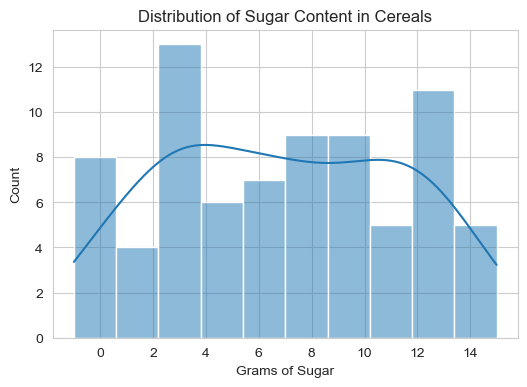

In [329]:

# Set visualization style
sns.set_style("whitegrid")

# Individual plots for better visibility in Jupyter Notebook

# Histogram of sugar content
plt.figure(figsize=(6, 4))
sns.histplot(df["sugars"], bins=10, kde=True)
plt.title("Distribution of Sugar Content in Cereals")
plt.xlabel("Grams of Sugar")
plt.ylabel("Count")
plt.show()


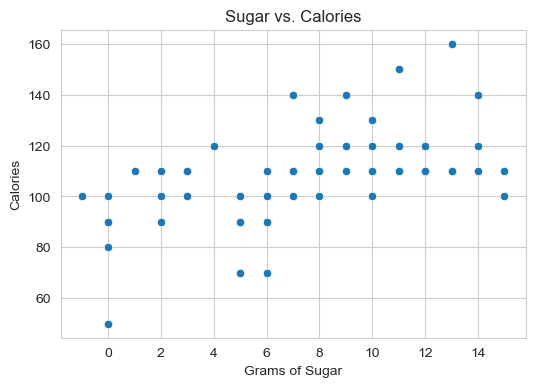

In [330]:

# Scatter plot: Sugar vs. Calories
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="sugars", y="calories")
plt.title("Sugar vs. Calories")
plt.xlabel("Grams of Sugar")
plt.ylabel("Calories")
plt.show()



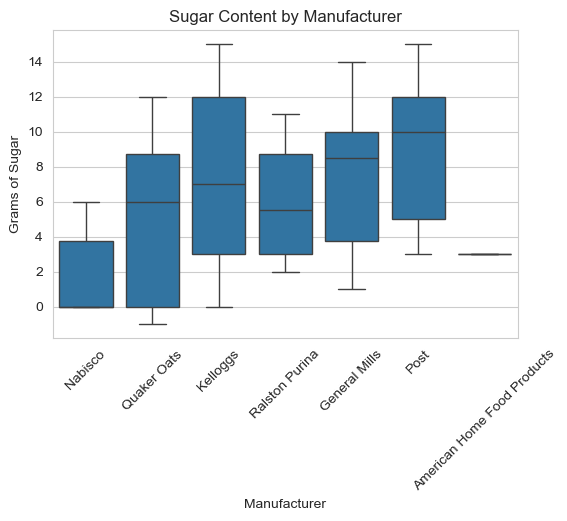

In [331]:
# Box plot: Sugar content by manufacturer
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="manufacturer", y="sugars")
plt.title("Sugar Content by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Grams of Sugar")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [332]:


# Calculate Weight Watchers points using the provided formula
df['ww_points'] = (df['calories'] * 0.0305 + df['fat'] * 0.275 + df['sugars'] * 0.12 - df['protein'] * 0.098).round(0).astype(int)
df['ww_points_old'] = (df['calories'] / 50 + df['fat'] / 12 - df['fiber'].clip(upper=4) / 5)
# Select cereals manufactured by Kelloggs
kelloggs_cereals = df[df['manufacturer'] == 'Kelloggs']

# Calculate summary statistics for Weight Watchers points for Kelloggs cereals
kelloggs_points_summary = kelloggs_cereals['ww_points'].describe()

print("Weight Watchers Points Summary for Kelloggs Cereals:\n", kelloggs_points_summary) 

Weight Watchers Points Summary for Kelloggs Cereals:
 count    23.000000
mean      4.217391
std       1.241572
min       1.000000
25%       3.000000
50%       5.000000
75%       5.000000
max       7.000000
Name: ww_points, dtype: float64


In [333]:

df['ww_points_new'] = (df['calories'] * 0.0305 + df['fat'] * 0.275 + df['sugars'] * 0.12 - df['protein'] * 0.098).round(0).astype(int)

# Calculate Old Weight Watchers Points
df['ww_points_old'] = (df['calories'] / 50 + df['fat'] / 12 - df['fiber'].clip(upper=4) / 5)

# Create a new column to compare points
df['points_difference'] = df['ww_points_new'] - df['ww_points_old'] 

# Select Kelloggs Cereals
kelloggs_cereals = df[df['manufacturer'] == 'K'] 

# Calculate and print summary statistics for Kelloggs cereals
kelloggs_points_summary = kelloggs_cereals['ww_points'].describe()
print("Weight Watchers Points Summary for Kelloggs Cereals:\n", kelloggs_points_summary) 

# Calculate and print summary statistics for the points difference
points_difference_summary = df['points_difference'].describe()
print("\nSummary Statistics for Points Difference:\n", points_difference_summary)

# ... (Rest of your code for visualization, etc.)

Weight Watchers Points Summary for Kelloggs Cereals:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ww_points, dtype: float64

Summary Statistics for Points Difference:
 count    77.000000
mean      2.242078
std       0.885304
min       0.000000
25%       1.600000
50%       2.333333
75%       2.916667
max       4.233333
Name: points_difference, dtype: float64


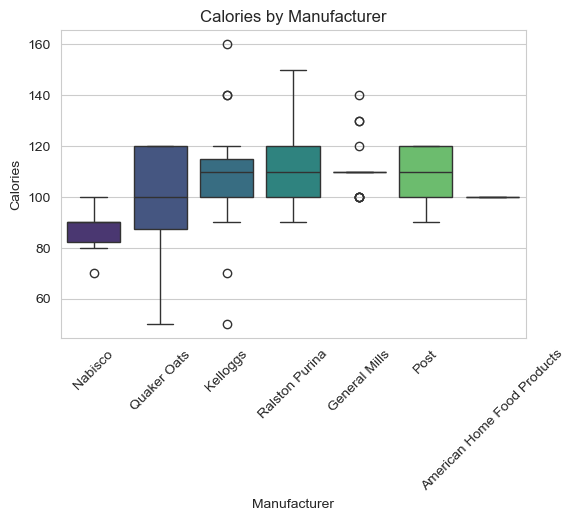

In [334]:

# Boxplot for Calories
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="manufacturer",
    y="calories",
    data=df,
    hue="manufacturer",
    palette="viridis",
    legend=False,
)
plt.title('Calories by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()


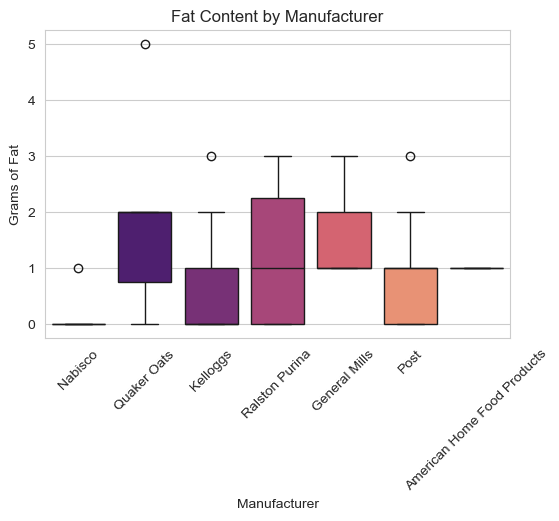

In [335]:
# Boxplot for Fat Content
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="manufacturer",
    y="fat",
    data=df,
    hue="manufacturer",
    palette="magma",
    legend=False,
)
plt.title('Fat Content by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Grams of Fat')
plt.xticks(rotation=45)
plt.show()